In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bering = pd.read_excel(filepath, sheet_name='Bering-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Bering)
fp.date_time(Bering)

,Extent,Date
0,320266.650,1979-01-01
1,541778.338,1979-02-01
2,638262.988,1979-03-01
3,423025.159,1979-04-01
4,215587.216,1979-05-01
...,...,...
488,317377.493,2023-05-01
489,39601.476,2023-06-01
490,16935.702,2023-07-01
491,1305.744,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bering['Extent'] = scaler.fit_transform(Bering['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 10
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bering['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((472, 12, 1), (472,))

In [8]:
X_train, y_train = X[:384], y[:384]
X_val, y_val = X[384:432], y[384:432]
X_test, y_test = X[432:], y[432:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bering_model_LT10/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
46/48 [===========================>..] - ETA: 0s - loss: 0.1522 - root_mean_squared_error: 0.3902

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 5s 76ms/step - loss: 0.1488 - root_mean_squared_error: 0.3857 - val_loss: 0.0604 - val_root_mean_squared_error: 0.2458
Epoch 2/50
43/48 [=========================>....] - ETA: 0s - loss: 0.0954 - root_mean_squared_error: 0.3089

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 58ms/step - loss: 0.0919 - root_mean_squared_error: 0.3031 - val_loss: 0.0516 - val_root_mean_squared_error: 0.2272
Epoch 3/50
41/48 [========================>.....] - ETA: 0s - loss: 0.0709 - root_mean_squared_error: 0.2663

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 62ms/step - loss: 0.0723 - root_mean_squared_error: 0.2689 - val_loss: 0.0443 - val_root_mean_squared_error: 0.2104
Epoch 4/50
35/48 [====================>.........] - ETA: 0s - loss: 0.0584 - root_mean_squared_error: 0.2417

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 65ms/step - loss: 0.0555 - root_mean_squared_error: 0.2356 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1961
Epoch 5/50
47/48 [============================>.] - ETA: 0s - loss: 0.0455 - root_mean_squared_error: 0.2133

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 59ms/step - loss: 0.0452 - root_mean_squared_error: 0.2125 - val_loss: 0.0348 - val_root_mean_squared_error: 0.1865
Epoch 6/50
34/48 [====================>.........] - ETA: 0s - loss: 0.0426 - root_mean_squared_error: 0.2064

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 59ms/step - loss: 0.0395 - root_mean_squared_error: 0.1988 - val_loss: 0.0324 - val_root_mean_squared_error: 0.1800
Epoch 7/50
32/48 [===================>..........] - ETA: 0s - loss: 0.0320 - root_mean_squared_error: 0.1788

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 67ms/step - loss: 0.0307 - root_mean_squared_error: 0.1753 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1753
Epoch 8/50
48/48 [==============================] - ETA: 0s - loss: 0.0286 - root_mean_squared_error: 0.1690

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 61ms/step - loss: 0.0286 - root_mean_squared_error: 0.1690 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1721
Epoch 9/50
40/48 [========================>.....] - ETA: 0s - loss: 0.0273 - root_mean_squared_error: 0.1653

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 59ms/step - loss: 0.0268 - root_mean_squared_error: 0.1637 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1677
Epoch 10/50
45/48 [===========================>..] - ETA: 0s - loss: 0.0260 - root_mean_squared_error: 0.1612

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 68ms/step - loss: 0.0252 - root_mean_squared_error: 0.1587 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1627
Epoch 11/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0200 - root_mean_squared_error: 0.1415

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 58ms/step - loss: 0.0197 - root_mean_squared_error: 0.1405 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1583
Epoch 12/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0188 - root_mean_squared_error: 0.1373 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1613
Epoch 13/50
33/48 [===================>..........] - ETA: 0s - loss: 0.0182 - root_mean_squared_error: 0.1349

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 64ms/step - loss: 0.0190 - root_mean_squared_error: 0.1378 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1579
Epoch 14/50
47/48 [============================>.] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1357

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 59ms/step - loss: 0.0183 - root_mean_squared_error: 0.1352 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1537
Epoch 15/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0157 - root_mean_squared_error: 0.1254 - val_loss: 0.0293 - val_root_mean_squared_error: 0.1710
Epoch 16/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0193 - root_mean_squared_error: 0.1388 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1757
Epoch 17/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0177 - root_mean_squared_error: 0.1329 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1672
Epoch 18/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0157 - root_mean_squared_error: 0.1252 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1686
Epoch 19/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0152 - root_mean_squared_error: 0.1231 - val_loss: 0.0293 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 58ms/step - loss: 0.0218 - root_mean_squared_error: 0.1477 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1497
Epoch 22/50
38/48 [======================>.......] - ETA: 0s - loss: 0.0219 - root_mean_squared_error: 0.1478

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 61ms/step - loss: 0.0238 - root_mean_squared_error: 0.1543 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1389
Epoch 23/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0151 - root_mean_squared_error: 0.1227 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1513
Epoch 24/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0182 - root_mean_squared_error: 0.1351 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1695
Epoch 25/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0151 - root_mean_squared_error: 0.1228 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1405
Epoch 26/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0169 - root_mean_squared_error: 0.1300 - val_loss: 0.0304 - val_root_mean_squared_error: 0.1743
Epoch 27/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0141 - root_mean_squared_error: 0.1188 - val_loss: 0.0246 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bering_model_LT10\assets


INFO:tensorflow:Assets written to: Bering_model_LT10\assets


48/48 [==============================] - 3s 61ms/step - loss: 0.0130 - root_mean_squared_error: 0.1140 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1337
Epoch 44/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0140 - root_mean_squared_error: 0.1183 - val_loss: 0.0308 - val_root_mean_squared_error: 0.1755
Epoch 45/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0174 - root_mean_squared_error: 0.1317 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1655
Epoch 46/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0152 - root_mean_squared_error: 0.1233 - val_loss: 0.0295 - val_root_mean_squared_error: 0.1718
Epoch 47/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0170 - root_mean_squared_error: 0.1304 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1355
Epoch 48/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0146 - root_mean_squared_error: 0.1210 - val_loss: 0.0302 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

0.9425413966178894 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

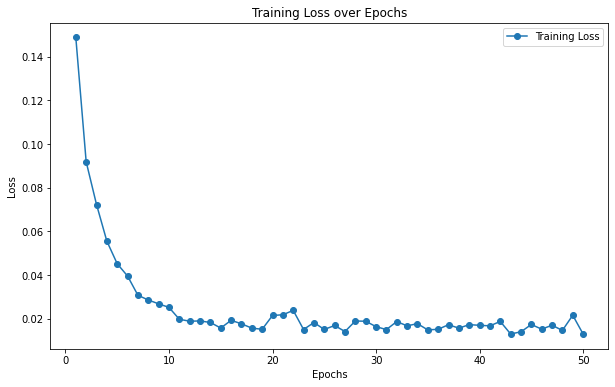

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

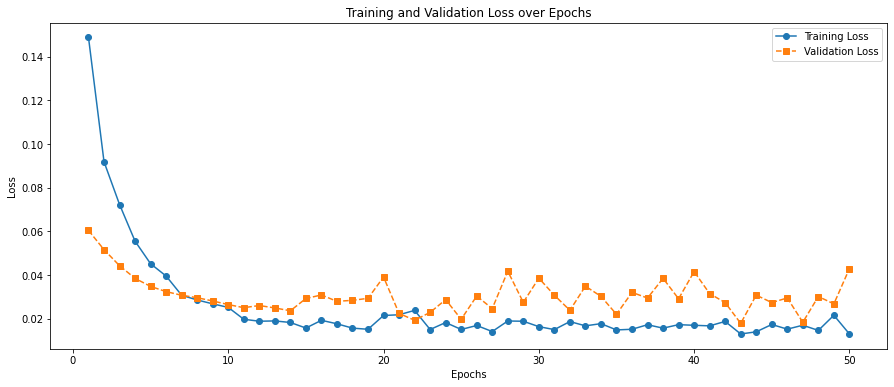

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bering_model_LT10/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.08251750108753873
MAE : 0.0632207684789344


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,551061.375000,652598.000
1,402122.218750,414216.785
2,225075.046875,236263.303
3,137915.875000,43422.368
4,89555.875000,2161.744
5,85376.765625,944.181
6,166988.375000,13977.643
7,204301.296875,24795.001
8,426850.156250,168828.990
9,561600.750000,461098.498


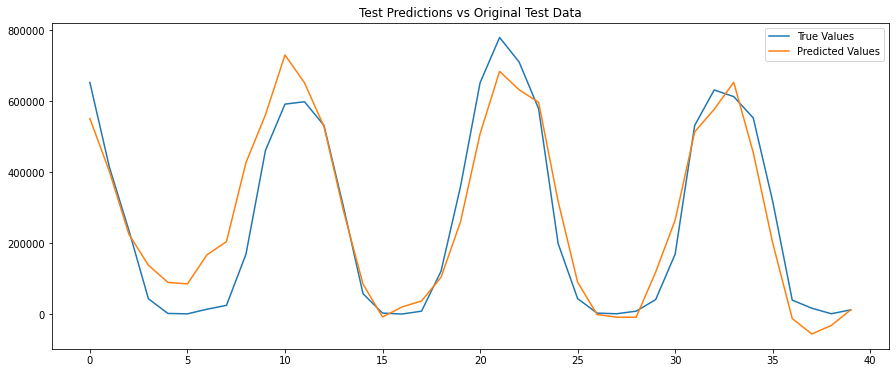

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

15/15 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

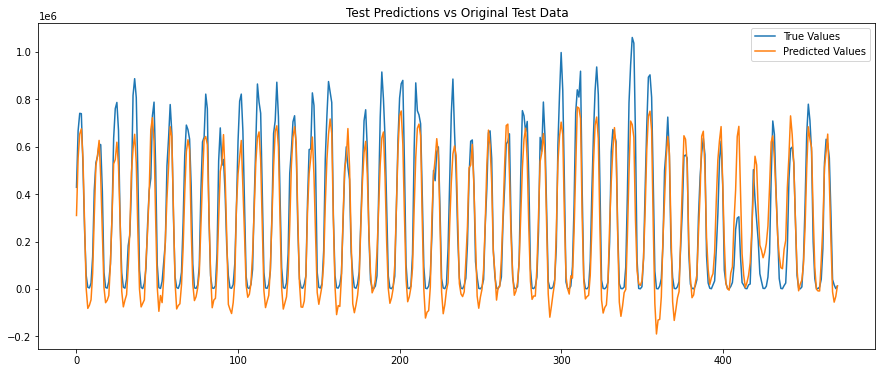

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()